# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly as ply
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv',nrows=50000)
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date project_grade_category  \
473             GA 2016-04-27 00:53:00          Grades PreK-2   
41558           WA 2016-04-27 01:05:25             Grades 3-5   

      project_subject_categories project_subject_subcategories  \
473             Applied Learning             Early Development   
41558        Literacy & Language                      Literacy   

                                project_title  \
473    Flexible Seating for Flexible Learning   
41558  Going Deep: The Art of Inner Thinking!   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  
473                                               2                    1  
41558                                             2                    1

In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date project_grade_category  \
473             GA 2016-04-27 00:53:00          Grades PreK-2   
41558           WA 2016-04-27 01:05:25             Grades 3-5   

                                project_title  \
473    Flexible Seating for Flexible Learning   
41558  Going Deep: The Art of Inner Thinking!   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
473                                               2                    1   
41558                                             2                    1   

        clean_categories clean_subcategories  \
473      AppliedLearning    EarlyDevelopment   
41558  Literacy_Language            Literacy   

                                                   essay  
473    I recently read an article about giving studen...  
41558  My students crave challenge, they eat obstacle...

In [10]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)

I recently read an article about giving students a choice about how they learn. We already set goals; why not let them choose where to sit, and give them options of what to sit on?I teach at a low-income (Title 1) school. Every year, I have a class with a range of abilities, yet they are all the same age. They learn differently, and they have different interests. Some have ADHD, and some are fast learners. Yet they are eager and active learners that want and need to be able to move around the room, yet have a place that they can be comfortable to complete their work.We need a classroom rug that we can use as a class for reading time, and students can use during other learning times. I have also requested four Kore Kids wobble chairs and four Back Jack padded portable chairs so that students can still move during whole group lessons without disrupting the class. Having these areas will provide these little ones with a way to wiggle while working.Benjamin Franklin once said, \"Tell me an

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20000])

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())
project_data['preprocessed_essays'] = preprocessed_essays

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [00:56<00:00, 885.89it/s]


### Number of words in combined Essay - Adding a new feature

In [18]:
# after preprocesing
proj_essay_wrd_count = []

for word in project_data['preprocessed_essays']:
    proj_essay_wrd_count.append(len(word.split()))
project_data['proj_essay_wrd_count'] = proj_essay_wrd_count

project_data.head(3)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   
29891      146723  p099708  c0a28c79fe8ad5810da49de47b3fb491           Mrs.   

      school_state                Date project_grade_category  \
473             GA 2016-04-27 00:53:00          Grades PreK-2   
41558           WA 2016-04-27 01:05:25             Grades 3-5   
29891           CA 2016-04-27 01:10:09             Grades 3-5   

                                project_title  \
473    Flexible Seating for Flexible Learning   
41558  Going Deep: The Art of Inner Thinking!   
29891      Breakout Box to Ignite Engagement!   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   
29891  It's the end of the school year. Routines have...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   
29891  My students desire challenges, movement, and c...   

                                         project_essay_3  \
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   
29891  I will design different clues using specific c...   

                                         project_essay_4  \
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   
29891  Donations to this project will immediately imp...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   
29891  My students need items from a \"Breakout Box\"...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
473                                               2                    1   
41558                                             2                    1   
29891                                             6                    1   

                  clean_categories         clean_subcategories  \
473                AppliedLearning            EarlyDevelopment   
41558            Literacy_Language                    Literacy   
29891  Math_Science History_Civics  Mathematics SocialSciences   

                                                   essay  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   
29891  It's the end of the school year. Routines have...   

                                     preprocessed_essays  proj_essay_wrd_count  
473    recently read article giving students choice l...                   114  
41558  students crave challenge eat obstacles breakfa...                   101  
29891  end school year routines run course students n...                   147

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [19]:
# printing some random essays.
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[1000])

Flexible Seating for Flexible Learning
Elmo for Math Instruction
Comfy Carpet for Creative Learning


In [20]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())
project_data['preprocessed_titles'] = preprocessed_titles

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:01<00:00, 26321.66it/s]


## Project title word count

In [21]:
proj_title_wrd_count = []

for word in project_data['preprocessed_titles']:
    proj_title_wrd_count.append(len(word.split()))
project_data['proj_title_wrd_count'] = proj_title_wrd_count
project_data.head(3)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   
29891      146723  p099708  c0a28c79fe8ad5810da49de47b3fb491           Mrs.   

      school_state                Date project_grade_category  \
473             GA 2016-04-27 00:53:00          Grades PreK-2   
41558           WA 2016-04-27 01:05:25             Grades 3-5   
29891           CA 2016-04-27 01:10:09             Grades 3-5   

                                project_title  \
473    Flexible Seating for Flexible Learning   
41558  Going Deep: The Art of Inner Thinking!   
29891      Breakout Box to Ignite Engagement!   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   
29891  It's the end of the school year. Routines have...   

                                         project_essay_2  ...  \
473    I teach at a low-income (Title 1) school. Ever...  ...   
41558  We are an urban, public k-5 elementary school....  ...   
29891  My students desire challenges, movement, and c...  ...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   
29891  My students need items from a \"Breakout Box\"...   

      teacher_number_of_previously_posted_projects project_is_approved  \
473                                              2                   1   
41558                                            2                   1   
29891                                            6                   1   

                  clean_categories         clean_subcategories  \
473                AppliedLearning            EarlyDevelopment   
41558            Literacy_Language                    Literacy   
29891  Math_Science History_Civics  Mathematics SocialSciences   

                                                   essay  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   
29891  It's the end of the school year. Routines have...   

                                     preprocessed_essays proj_essay_wrd_count  \
473    recently read article giving students choice l...                  114   
41558  students crave challenge eat obstacles breakfa...                  101   
29891  end school year routines run course students n...                  147   

                      preprocessed_titles  proj_title_wrd_count  
473    flexible seating flexible learning                     4  
41558   going deep the art inner thinking                     6  
29891      breakout box ignite engagement                     4  

[3 rows x 22 columns]

## 1.4.1 Project_grade preprocessing

In [22]:
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(" ", "_")
project_data['project_grade_category'].value_counts()

Grades_PreK-2    20316
Grades_3-5       16968
Grades_6-8        7750
Grades_9-12       4966
Name: project_grade_category, dtype: int64

### Preprocessing teacher_prefix

In [23]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.replace(".","")

#Dropping the 2 rows from the data where the 'teacher_prefix' is NAN
project_data = project_data.dropna(subset=['teacher_prefix'])

project_data['teacher_prefix'].value_counts(dropna=False)

Mrs        26140
Ms         17936
Mr          4859
Teacher     1061
Dr             2
Name: teacher_prefix, dtype: int64

## 1.5 Preparing data for models

In [24]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay',
       'preprocessed_essays', 'proj_essay_wrd_count', 'preprocessed_titles',
       'proj_title_wrd_count'],
      dtype='object')

we are going to consider

       
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - school_state : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - preprocessed_titles: text data
       - preprocessed_essays : text data

       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### Split data into Train and Test

In [25]:
Y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)

In [26]:
X = project_data
X.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3            Mrs   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5            Mrs   

      school_state                Date project_grade_category  \
473             GA 2016-04-27 00:53:00          Grades_PreK-2   
41558           WA 2016-04-27 01:05:25             Grades_3-5   

                                project_title  \
473    Flexible Seating for Flexible Learning   
41558  Going Deep: The Art of Inner Thinking!   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  ...  \
473    I teach at a low-income (Title 1) school. Ever...  ...   
41558  We are an urban, public k-5 elementary school....  ...   

                                         project_essay_4  \
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

      teacher_number_of_previously_posted_projects   clean_categories  \
473                                              2    AppliedLearning   
41558                                            2  Literacy_Language   

      clean_subcategories                                              essay  \
473      EarlyDevelopment  I recently read an article about giving studen...   
41558            Literacy  My students crave challenge, they eat obstacle...   

                                     preprocessed_essays proj_essay_wrd_count  \
473    recently read article giving students choice l...                  114   
41558  students crave challenge eat obstacles breakfa...                  101   

                      preprocessed_titles proj_title_wrd_count  
473    flexible seating flexible learning                    4  
41558   going deep the art inner thinking                    6  

[2 rows x 21 columns]

In [27]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, stratify=Y)

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

### Response Table for Train and Test data

In [28]:
X_train_coded = X_train
X_train_coded['Approval'] = Y_train

X_test_coded = X_test
X_test_coded['Approval'] = Y_test

In [29]:
# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):

    value_count = df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        vec = []
        for k in range(0,2):

            cls_cnt = df.loc[(df['Approval']==k) & (df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):

    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []

    for index, row in tqdm(df.iterrows()):
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/2,1/2])
    return gv_fea

### Response encoding - Clean_Categories

In [30]:
alpha = 1
clean_cat_rc_train = np.array(get_gv_feature(alpha, "clean_categories", X_train_coded))
                              
clean_cat_rc_test= np.array(get_gv_feature(alpha,"clean_categories",X_test_coded))                             

33498it [00:26, 1279.24it/s]
16500it [00:14, 1117.76it/s]


In [31]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

normalizer.fit(clean_cat_rc_train)

clean_cat_rc_train = normalizer.transform(clean_cat_rc_train)

clean_cat_rc_test = normalizer.transform(clean_cat_rc_test)

print("After vectorizations")
print("="*100)
print(clean_cat_rc_train.shape, Y_train.shape)
print(clean_cat_rc_test.shape, Y_test.shape)

print("="*100)

After vectorizations
(33498, 2) (33498,)
(16500, 2) (16500,)


### Response encoding - Clean_Sub-Categories

In [32]:
sub_cat_rc_train = np.array(get_gv_feature(alpha, "clean_subcategories", X_train_coded))
sub_cat_rc_test = np.array(get_gv_feature(alpha, "clean_subcategories", X_test_coded))

33498it [02:50, 196.67it/s]
16500it [01:14, 221.55it/s]


In [33]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

normalizer.fit(sub_cat_rc_train)

sub_cat_rc_train = normalizer.transform(sub_cat_rc_train)

sub_cat_rc_test = normalizer.transform(sub_cat_rc_test)

print("After vectorizations")
print("="*100)
print(sub_cat_rc_train.shape, Y_train.shape)
print(sub_cat_rc_test.shape, Y_test.shape)

print("="*100)

After vectorizations
(33498, 2) (33498,)
(16500, 2) (16500,)


### Response encoding - School_States

In [34]:
school_state_rc_train = np.array(get_gv_feature(alpha, "school_state", X_train_coded))
school_state_rc_test = np.array(get_gv_feature(alpha, "school_state", X_test_coded))

33498it [00:34, 973.58it/s] 
16500it [00:14, 1158.69it/s]


In [35]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

normalizer.fit(school_state_rc_train)

school_state_rc_train = normalizer.transform(school_state_rc_train)

school_state_rc_test = normalizer.transform(school_state_rc_test)

print("After vectorizations")
print("="*100)
print(school_state_rc_train.shape, Y_train.shape)
print(school_state_rc_test.shape, Y_test.shape)

print("="*100)

After vectorizations
(33498, 2) (33498,)
(16500, 2) (16500,)


### Response encoding - Project_Grade_Category

In [36]:
project_grade_cat_rc_train = np.array(get_gv_feature(alpha, "project_grade_category", X_train_coded))
project_grade_cat_rc_test = np.array(get_gv_feature(alpha, "project_grade_category", X_test_coded))

33498it [00:09, 3609.17it/s]
16500it [00:06, 2688.54it/s]


In [37]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

normalizer.fit(project_grade_cat_rc_train)

project_grade_cat_rc_train = normalizer.transform(project_grade_cat_rc_train)

project_grade_cat_rc_test = normalizer.transform(project_grade_cat_rc_test)

print("After vectorizations")
print("="*100)
print(project_grade_cat_rc_train.shape, Y_train.shape)
print(project_grade_cat_rc_test.shape, Y_test.shape)

print("="*100)

After vectorizations
(33498, 2) (33498,)
(16500, 2) (16500,)


### Response encoding - Teacher_Prefix

In [38]:
teacher_prefix_cat_rc_train = np.array(get_gv_feature(alpha, "teacher_prefix", X_train_coded))
teacher_prefix_cat_rc_test = np.array(get_gv_feature(alpha, "teacher_prefix", X_test_coded))

33498it [00:09, 3908.43it/s]
16500it [00:04, 3504.79it/s]


In [39]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

normalizer.fit(teacher_prefix_cat_rc_train)

teacher_prefix_cat_rc_train = normalizer.transform(teacher_prefix_cat_rc_train)

teacher_prefix_cat_rc_test = normalizer.transform(teacher_prefix_cat_rc_test)

print("After vectorizations")
print("="*100)
print(teacher_prefix_cat_rc_train.shape, Y_train.shape)
print(teacher_prefix_cat_rc_test.shape, Y_test.shape)

print("="*100)

After vectorizations
(33498, 2) (33498,)
(16500, 2) (16500,)


In [40]:
train_rcoding_data = np.hstack((clean_cat_rc_train,sub_cat_rc_train,school_state_rc_train,project_grade_cat_rc_train,teacher_prefix_cat_rc_train))

In [41]:
train_rcoding_data.shape

(33498, 10)

In [42]:
test_rcoding_data = np.hstack((clean_cat_rc_test,sub_cat_rc_test,school_state_rc_test,project_grade_cat_rc_test,teacher_prefix_cat_rc_test))

In [43]:
test_rcoding_data.shape

(16500, 10)

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

#### BOW of eassys - Train/Test Data

In [44]:
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train['preprocessed_essays'])

#BOW for essays Train Data
essay_bow_train = vectorizer.transform(X_train['preprocessed_essays'])
print("Shape of matrix for TRAIN data ",essay_bow_train.shape)
f_nm_bow_eassy_tr = vectorizer.get_feature_names()#Storing the names of the BOW train feature data.
print(f_nm_bow_eassy_tr[10:50])

#BOW for essays Test Data
essay_bow_test = vectorizer.transform(X_test['preprocessed_essays'])
print("Shape of matrix for TEST data",essay_bow_test.shape)

Shape of matrix for TRAIN data  (33498, 10343)
['1100', '115', '11th', '12', '120', '1200', '125', '12th', '13', '130', '14', '140', '1400', '15', '150', '1500', '16', '160', '1600', '17', '170', '1700', '18', '180', '1800', '19', '1990', '1st', '20', '200', '2000', '2003', '2004', '2006', '2007', '2008', '2009', '2010', '2011', '2012']
Shape of matrix for TEST data (16500, 10343)


#### BOW of Project Titles - Train/Test Data¶

In [45]:
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train['preprocessed_titles'])

# BOW for title Train Data
title_bow_train = vectorizer.transform(X_train['preprocessed_titles'])
print("Shape of matrix for TRAIN data ",title_bow_train.shape)
f_nm_bow_title_tr = vectorizer.get_feature_names()#Storing the names of the BOW train feature data.
print(f_nm_bow_title_tr[10:50])

# BOW for title Test Data
title_bow_test = vectorizer.transform(X_test['preprocessed_titles'])
print("Shape of matrix for TEST data",title_bow_test.shape)

Shape of matrix for TRAIN data  (33498, 1637)
['2nd', '3d', '3doodler', '3rd', '4th', '5th', '60', '6th', '7th', '8th', 'abc', 'about', 'academic', 'academics', 'access', 'accessible', 'accessing', 'accessories', 'achieve', 'achievement', 'achieving', 'across', 'act', 'action', 'active', 'activities', 'activity', 'add', 'adding', 'advanced', 'adventure', 'adventures', 'after', 'again', 'age', 'ahead', 'aid', 'air', 'algebra', 'alive']
Shape of matrix for TEST data (16500, 1637)


#### TFIDF vectorizer for essay

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['preprocessed_essays'])

#tidf Train Data
essay_tfidf_train = vectorizer.transform(X_train['preprocessed_essays'])
print("Shape of matrix for TRAIN data",essay_tfidf_train.shape)
f_nm_tidf_eassy_tr = vectorizer.get_feature_names()#Storing the names of the BOW train feature data.
print(f_nm_tidf_eassy_tr[10:50])

#tidf Test Data
essay_tfidf_test = vectorizer.transform(X_test['preprocessed_essays'])
print("Shape of matrix for TEST data",essay_tfidf_test.shape)

Shape of matrix for TRAIN data (33498, 10343)
['1100', '115', '11th', '12', '120', '1200', '125', '12th', '13', '130', '14', '140', '1400', '15', '150', '1500', '16', '160', '1600', '17', '170', '1700', '18', '180', '1800', '19', '1990', '1st', '20', '200', '2000', '2003', '2004', '2006', '2007', '2008', '2009', '2010', '2011', '2012']
Shape of matrix for TEST data (16500, 10343)


#### TFIDF vectorizer for Title

In [47]:
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['preprocessed_titles'])

#tidf Train Data
title_tfidf_train = vectorizer.transform(X_train['preprocessed_titles'])
print("Shape of matrix for TRAIN data",title_tfidf_train.shape)
f_nm_tidf_title_tr = vectorizer.get_feature_names()#Storing the names of the BOW train feature data.
print(f_nm_tidf_title_tr[10:50])


#tidf Test Data
title_tfidf_test = vectorizer.transform(X_test['preprocessed_titles'])
print("Shape of matrix for TEST data",title_tfidf_test.shape)

Shape of matrix for TRAIN data (33498, 1637)
['2nd', '3d', '3doodler', '3rd', '4th', '5th', '60', '6th', '7th', '8th', 'abc', 'about', 'academic', 'academics', 'access', 'accessible', 'accessing', 'accessories', 'achieve', 'achievement', 'achieving', 'across', 'act', 'action', 'active', 'activities', 'activity', 'add', 'adding', 'advanced', 'adventure', 'adventures', 'after', 'again', 'age', 'ahead', 'aid', 'air', 'algebra', 'alive']
Shape of matrix for TEST data (16500, 1637)


### AVG- W2V vectorizer for Essay

In [48]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [49]:
# average Word2Vec Function
# compute average word2vec for each review.
# the avg-w2v for each sentence/review is stored in this list
def avg_w2v_vectors_func(sentance):
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    return vector

In [50]:
essay_avg_w2v_train = []
essay_avg_w2v_test  = []

for sentence in tqdm(X_train['preprocessed_essays']):
    essay_avg_w2v_train.append(avg_w2v_vectors_func(sentance)) # Avg-w2v for Train data
    
# Avg-w2v for Train data    
print("len(essay_avg_w2v_train):",len(essay_avg_w2v_train))
print("len(essay_avg_w2v_train[0])",len(essay_avg_w2v_train[0]))

for sentence in tqdm(X_test['preprocessed_essays']):
    essay_avg_w2v_test.append(avg_w2v_vectors_func(sentance)) # Avg-w2v for Test data

# Avg-w2v for Test data
print("len(essay_avg_w2v_test):",len(essay_avg_w2v_test))
print("len(essay_avg_w2v_test[0])",len(essay_avg_w2v_test[0]))

100%|██████████████████████████████████████████████████████████████████████████| 33498/33498 [00:17<00:00, 1926.66it/s]


len(essay_avg_w2v_train): 33498
len(essay_avg_w2v_train[0]) 300


100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:08<00:00, 1923.94it/s]


len(essay_avg_w2v_test): 16500
len(essay_avg_w2v_test[0]) 300


### AVG- W2V vectorizer for Titile

In [51]:
title_avg_w2v_train = []
title_avg_w2v_test  = []

for sentence in tqdm(X_train['preprocessed_titles']):
    title_avg_w2v_train.append(avg_w2v_vectors_func(sentance)) # Avg-w2v for Train data
    
# Avg-w2v for Train data    
print("len(title_avg_w2v_train):",len(title_avg_w2v_train))
print("len(title_avg_w2v_train[0])",len(title_avg_w2v_train[0]))


for sentence in tqdm(X_test['preprocessed_titles']):
    title_avg_w2v_test.append(avg_w2v_vectors_func(sentance)) # Avg-w2v for Test data

# Avg-w2v for Test data
print("len(title_avg_w2v_test):",len(title_avg_w2v_test))
print("len(title_avg_w2v_test[0])",len(title_avg_w2v_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 33498/33498 [00:00<00:00, 37379.23it/s]


len(title_avg_w2v_train): 33498
len(title_avg_w2v_train[0]) 300


100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 43813.92it/s]


len(title_avg_w2v_test): 16500
len(title_avg_w2v_test[0]) 300


### TFIDF weighted W2V for Essay

In [52]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [53]:
# Compute  TFIDF weighted W2V for each sentence of the review.

def tf_idf_weight_func(sentence): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    return vector

In [54]:
essay_tfidf_w2v_train = []
essay_tfidf_w2v_test  = []

for sentence in tqdm(X_train['preprocessed_essays']):
    essay_tfidf_w2v_train.append(tf_idf_weight_func(sentance)) #  TFIDF weighted W2V for Train data
print("len(essay_tfidf_w2v_train)",len(essay_tfidf_w2v_train))
print("len(essay_tfidf_w2v_train[0])",len(essay_tfidf_w2v_train[0]))

for sentence in tqdm(X_test['preprocessed_essays']):
    essay_tfidf_w2v_test.append(tf_idf_weight_func(sentance)) #  TFIDF weighted W2V for Test data
print("len(essay_tfidf_w2v_test)",len(essay_tfidf_w2v_test))
print("len(essay_tfidf_w2v_test[0])",len(essay_tfidf_w2v_test[0]))

100%|████████████████████████████████████████████████████████████████████████| 33498/33498 [00:00<00:00, 155210.74it/s]


len(essay_tfidf_w2v_train) 33498
len(essay_tfidf_w2v_train[0]) 300


100%|████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 179495.27it/s]


len(essay_tfidf_w2v_test) 16500
len(essay_tfidf_w2v_test[0]) 300


###  TFIDF weighted W2V for Titile

In [55]:
title_tfidf_w2v_train  = []
title_tfidf_w2v_test  = []

for sentence in tqdm(X_train['preprocessed_titles']):
    title_tfidf_w2v_train.append(tf_idf_weight_func(sentance)) #  TFIDF weighted W2V for Train data
print("len(title_tfidf_w2v_train)",len(title_tfidf_w2v_train))
print("len(title_tfidf_w2v_train[0])",len(title_tfidf_w2v_train[0]))

for sentence in tqdm(X_test['preprocessed_titles']):
    title_tfidf_w2v_test.append(tf_idf_weight_func(sentance)) #  TFIDF weighted W2V for Test data
print("len(title_tfidf_w2v_test)",len(title_tfidf_w2v_test))
print("len(title_tfidf_w2v_test[0])",len(title_tfidf_w2v_test[0]))

100%|████████████████████████████████████████████████████████████████████████| 33498/33498 [00:00<00:00, 206921.59it/s]


len(title_tfidf_w2v_train) 33498
len(title_tfidf_w2v_train[0]) 300


100%|████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 227152.98it/s]


len(title_tfidf_w2v_test) 16500
len(title_tfidf_w2v_test[0]) 300


### 1.5.3 Vectorizing Numerical features

In [56]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(3)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21
2  p000003  298.97         4

In [57]:
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')

In [58]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['price'].values.reshape(-1,1))

price_data_train = normalizer.transform(X_train['price'].values.reshape(-1,1))

price_data_test = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print("="*100)
print(price_data_train.shape, Y_train.shape)
print(price_data_test.shape, Y_test.shape)

print("="*100)

After vectorizations
(33498, 1) (33498,)
(16500, 1) (16500,)


#### Vectorizing Quantity Feature

In [59]:
normalizer = Normalizer()

normalizer.fit(X_train['quantity'].values.reshape(-1,1))

quant_train = normalizer.transform(X_train['quantity'].values.reshape(-1,1))
quant_test = normalizer.transform(X_test['quantity'].values.reshape(-1,1))

print("="*100)
print("After vectorizations")
print(quant_train.shape, Y_train.shape)
print(quant_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(33498, 1) (33498,)
(16500, 1) (16500,)


####  Vectorizing teacher_number_of_previously_posted_projects 

In [60]:
normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

prev_no_projects_train = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_no_projects_test = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("="*100)
print("After vectorizations")
print(prev_no_projects_train.shape, Y_train.shape)
print(prev_no_projects_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(33498, 1) (33498,)
(16500, 1) (16500,)


### Vectorising the Word count of title feature

In [61]:
normalizer = Normalizer()

normalizer.fit(X_train['proj_title_wrd_count'].values.reshape(-1,1))

title_cnt_train = normalizer.transform(X_train['proj_title_wrd_count'].values.reshape(-1,1))
title_cnt_test = normalizer.transform(X_test['proj_title_wrd_count'].values.reshape(-1,1))

print("="*100)
print("After vectorizations")
print(title_cnt_train.shape, Y_train.shape)
print(title_cnt_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(33498, 1) (33498,)
(16500, 1) (16500,)


### Vectorising the Word count of Essay feature

In [62]:
normalizer = Normalizer()

normalizer.fit(X_train['proj_title_wrd_count'].values.reshape(-1,1))

essay_cnt_train = normalizer.transform(X_train['proj_essay_wrd_count'].values.reshape(-1,1))
essay_cnt_test = normalizer.transform(X_test['proj_essay_wrd_count'].values.reshape(-1,1))

print("="*100)
print("After vectorizations")
print(essay_cnt_train.shape, Y_train.shape)
print(essay_cnt_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(33498, 1) (33498,)
(16500, 1) (16500,)


# Assignment 9: RF and GBDT

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Random Forest</h1>

### 2.4.1 Applying Random Forest  on BOW,<font color='red'> SET 1</font>

In [173]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merge = hstack((clean_cat_rc_train,sub_cat_rc_train,school_state_rc_train,project_grade_cat_rc_train,teacher_prefix_cat_rc_train,price_data_train,quant_train, prev_no_projects_train,title_bow_train, essay_bow_train)).tocsr()

X_test_merge = hstack((clean_cat_rc_test,sub_cat_rc_test,school_state_rc_test,project_grade_cat_rc_test,teacher_prefix_cat_rc_test, price_data_test, quant_test, prev_no_projects_test,title_bow_test, essay_bow_test)).tocsr()

print("Final Data matrix")
print("="*100)
print(X_train_merge.shape, Y_train.shape)
print(X_test_merge.shape, Y_test.shape)
print("="*100)

Final Data matrix
(33498, 11993) (33498,)
(16500, 11993) (16500,)


#### Best hyper prameter using the ROC/AUC higest value and K-fold cross validation.

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

parameters = {'n_estimators':[5, 10, 50, 100, 500], 'max_depth': [2,3,5,10,50]}


clf = GridSearchCV(rf, parameters, cv= 4 , scoring='roc_auc')

clf.fit(X_train_merge,Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']
#parm_max_depth = clf.cv_results_['param_max_depth']
#param_min_samples_split = clf.cv_results_['param_min_samples_split']

#Summary of the grid search
print('Best Score: ', clf.best_score_)
print('Best Params: ', clf.best_params_)

Best Score:  0.6650815601584562
Best Params:  {'max_depth': 10, 'n_estimators': 500}


In [84]:
rf_gridsearch = pd.DataFrame(clf.cv_results_)
rf_gridsearch.head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.111790      0.011341         0.037606        0.002698   
1       0.134358      0.014513         0.050634        0.003509   

  param_max_depth param_n_estimators                                params  \
0               2                  5   {'max_depth': 2, 'n_estimators': 5}   
1               2                 10  {'max_depth': 2, 'n_estimators': 10}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.557878           0.541610           0.540478           0.555748   
1           0.570795           0.578915           0.590640           0.567935   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.548928        0.007930               25            0.564651   
1         0.577071        0.008808               23            0.568321   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.553001            0.566940            0.566990   
1            0.603205            0.604271            0.582738   

   mean_train_score  std_train_score  
0          0.562896         0.005790  
1          0.589634         0.015002

### Heatmap for the hyperparameters along with the AUC score.

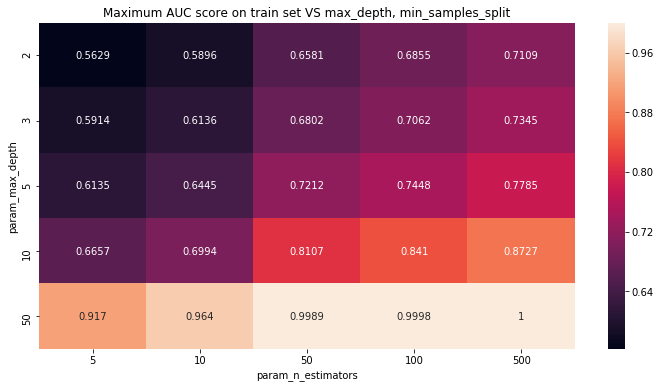

In [85]:
#https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
    

#Maximum AUC score on train set VS max_depth, min_samples_split
max_scores = rf_gridsearch.groupby(['param_max_depth',
                                    'param_n_estimators']).max().unstack()[['mean_test_score', 'mean_train_score']]
plt.rcParams["figure.figsize"] = (12, 6)

title = 'Maximum AUC score on train set VS max_depth, min_samples_split'

sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');
plt.title(title);

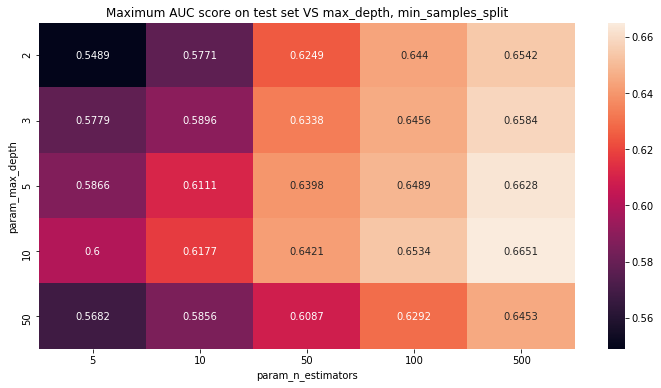

In [86]:
#Maximum AUC score on test set VS max_depth, min_samples_split

plt.rcParams["figure.figsize"] = (12, 6)

title = 'Maximum AUC score on test set VS max_depth, min_samples_split'

sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');
plt.title(title);

### Best Train Model using best Hyper parameter.

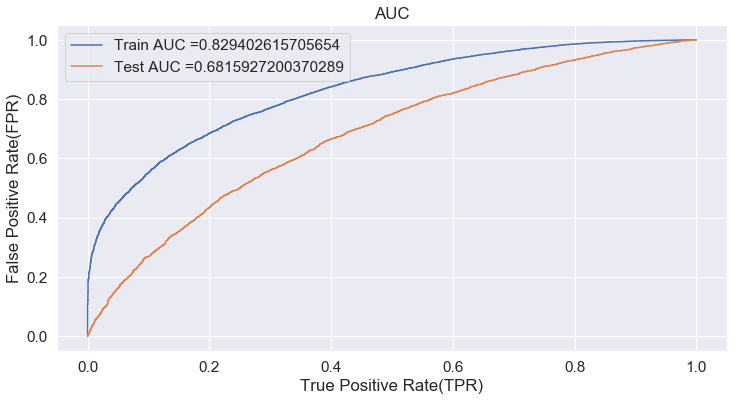

In [174]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 10, n_estimators= 500,class_weight='balanced')

clf = rf.fit(X_train_merge, Y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = rf.predict_proba(X_train_merge)[:,1]    
y_test_pred = rf.predict_proba(X_test_merge)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(True)
plt.show()

### Confusion Matrix

In [175]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [176]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))
print("="*100)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.5523731120069854 for threshold 0.502
[[ 3927  1241]
 [ 7736 20594]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.40145733017283475 for threshold 0.509
[[1692  854]
 [5675 8279]]


### Confusion Matrix -Heat map - Train

the maximum value of tpr*(1-fpr) 0.5523731120069854 for threshold 0.502


Text(80.5, 0.5, 'Actual Label')

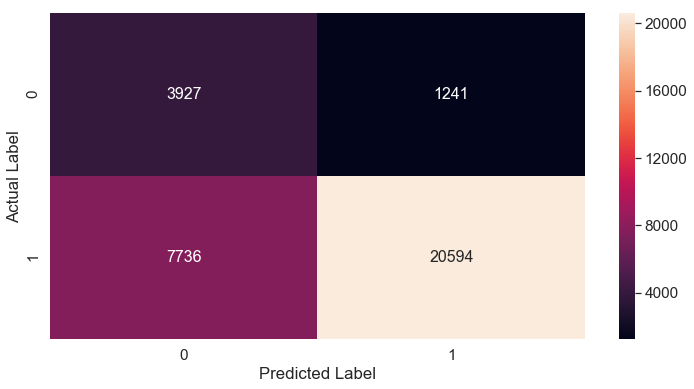

In [177]:
conf_mat_BOW_train = pd.DataFrame(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_mat_BOW_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

### Confusion Matrix -Heat map - Test

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.502


Text(80.5, 0.5, 'Actual Label')

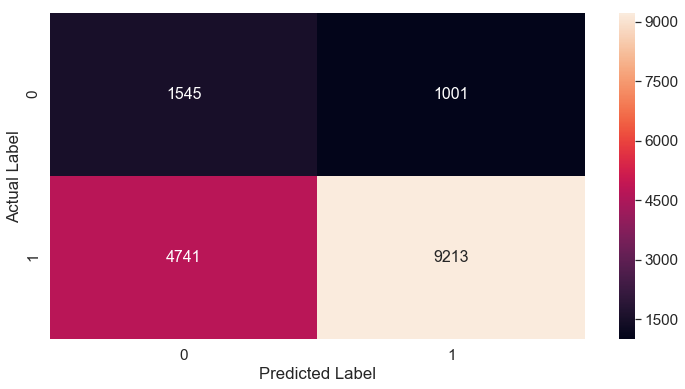

In [178]:
conf_mat_BOW_test= pd.DataFrame(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_mat_BOW_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

## 2.4.2 Applying Decision Tree on TFIDF,<font color='red'> SET 2</font>

In [92]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merge = hstack((clean_cat_rc_train,sub_cat_rc_train,school_state_rc_train,project_grade_cat_rc_train,teacher_prefix_cat_rc_train,price_data_train, quant_train, prev_no_projects_train,title_tfidf_train, essay_tfidf_train)).tocsr()
X_test_merge = hstack((clean_cat_rc_test,sub_cat_rc_test,school_state_rc_test,project_grade_cat_rc_test,teacher_prefix_cat_rc_test, price_data_test, quant_test, prev_no_projects_test,title_tfidf_test, essay_tfidf_test)).tocsr()

print("Final Data matrix")
print("="*100)
print(X_train_merge.shape, Y_train.shape)
print(X_test_merge.shape, Y_test.shape)
print("="*100)

Final Data matrix
(33498, 11969) (33498,)
(16500, 11969) (16500,)


### Best Hyperparameter using the grid search

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

parameters = {'n_estimators':[5, 10, 50, 100, 500], 'max_depth': [2,3,5,10,50]}


clf = GridSearchCV(rf, parameters, cv= 5 , scoring='roc_auc')

clf.fit(X_train_merge,Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']
#parm_max_depth = clf.cv_results_['param_max_depth']
#param_min_samples_split = clf.cv_results_['param_min_samples_split']

#Summary of the grid search
print('Best Score: ', clf.best_score_)
print('Best Params: ', clf.best_params_)

Best Score:  0.6823605499717018
Best Params:  {'max_depth': 50, 'n_estimators': 500}


### Heatmap for the hyperparameters along with the AUC score for train.

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.131160      0.007853         0.024939        0.007203   
1       0.164424      0.017213         0.042181        0.003941   
2       0.449606      0.023849         0.125887        0.009036   

  param_max_depth param_n_estimators                                params  \
0               2                  5   {'max_depth': 2, 'n_estimators': 5}   
1               2                 10  {'max_depth': 2, 'n_estimators': 10}   
2               2                 50  {'max_depth': 2, 'n_estimators': 50}   

   split0_test_score  split1_test_score  split2_test_score  ...  \
0           0.579869           0.517991           0.546004  ...   
1           0.583812           0.600236           0.588456  ...   
2           0.649088           0.603724           0.629468  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.545669        0.019912               25            0.580259   
1         0.580339        0.014642               22            0.601488   
2         0.627221        0.014695               15            0.671630   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.531076            0.557515            0.547235   
1            0.617963            0.613560            0.612156   
2            0.656635            0.672327            0.668802   

   split4_train_score  mean_train_score  std_train_score  
0            0.564199          0.556057         0.016468  
1            0.572923          0.603618         0.016274  
2            0.668014          0.667482         0.005663  

[3 rows x 22 columns]

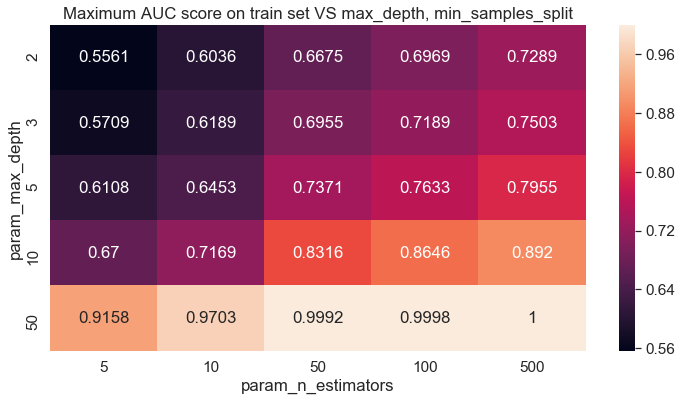

In [94]:
#https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
    
rf_gridsearch = pd.DataFrame(clf.cv_results_)

#Maximum AUC score on train set VS max_depth, min_samples_split
max_scores = rf_gridsearch.groupby(['param_max_depth',
                                    'param_n_estimators']).max().unstack()[['mean_test_score', 'mean_train_score']]
plt.rcParams["figure.figsize"] = (12, 6)

title = 'Maximum AUC score on train set VS max_depth, param_n_estimators'

sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');
plt.title(title);

rf_gridsearch.head(3)

### Heatmap for the hyperparameters along with the AUC score for test.

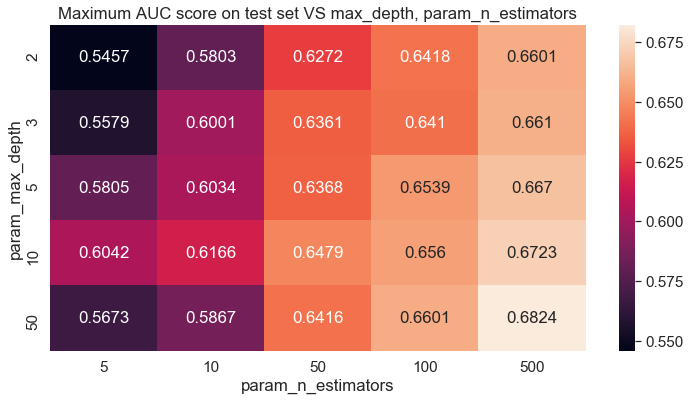

In [95]:
#Maximum AUC score on test set VS max_depth, min_samples_split

plt.rcParams["figure.figsize"] = (12, 6)

title = 'Maximum AUC score on test set VS max_depth, param_n_estimators'

sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');
plt.title(title);

#### Train Model using the best value of the hyper parameter

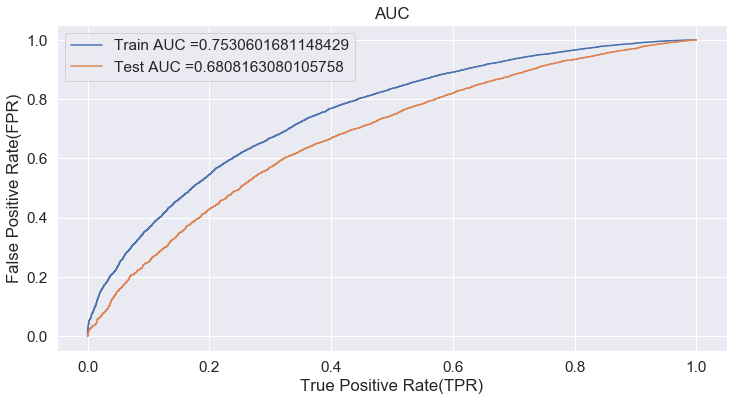

In [98]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

rf = RandomForestClassifier(max_depth = 5, n_estimators= 100,class_weight='balanced')

clf = rf.fit(X_train_merge, Y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = rf.predict_proba(X_train_merge)[:,1]    
y_test_pred = rf.predict_proba(X_test_merge)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(True)
plt.show()

### Confusion Matrix

In [99]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
print("="*100)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.493
[[ 2584  2584]
 [ 4650 23680]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.506
[[1830  716]
 [6310 7644]]


### Confusion Matrix - Heat map -train.

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.493


Text(80.5, 0.5, 'Actual Label')

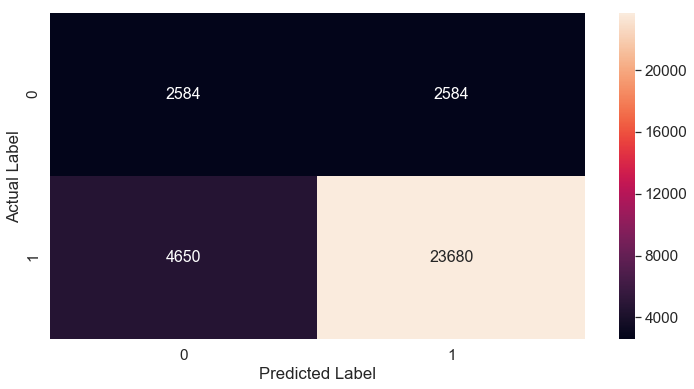

In [100]:
conf_matr_df_tfidf_train = pd.DataFrame(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

#### Confusion Matrix - Heat map - TEST data.

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.506


Text(80.5, 0.5, 'Actual Label')

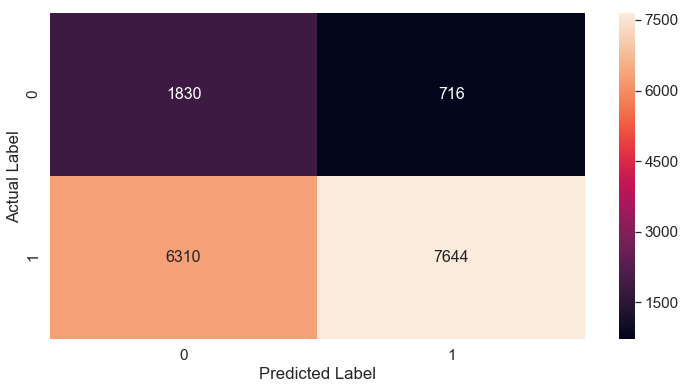

In [101]:
conf_matr_df_tfidf_test = pd.DataFrame(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

# 2.4.3 Applying Decision Tree on AVG-W2V , SET 3

In [63]:
title_avg_w2v_train_array = np.array(title_avg_w2v_train)
essay_avg_w2v_train_array = np.array(essay_avg_w2v_train)
title_avg_w2v_test_array = np.array(title_avg_w2v_test)
essay_avg_w2v_test_array = np.array(essay_avg_w2v_test)

print(title_avg_w2v_train_array.shape)
print(title_avg_w2v_test_array.shape)
print(essay_avg_w2v_train_array.shape)
print(essay_avg_w2v_test_array.shape)

(33498, 300)
(16500, 300)
(33498, 300)
(16500, 300)


In [64]:
#https://stackoverflow.com/questions/47353363/what-is-the-most-pythonic-way-to-split-a-2d-array-to-arrays-of-each-row?rq=1
def split_feature(feature):
    a, b = zip(* feature)
    
    return(a,b)

### Spliting the train feature into two with state 0 and state 1

In [65]:
clean_cat_train_0 , clean_cat_train_1 = split_feature(clean_cat_rc_train)

clean_cat_train_0 = np.array(list(clean_cat_train_0)).reshape(-1,1)
clean_cat_train_1 = np.array(list(clean_cat_train_1)).reshape(-1,1)
print(clean_cat_train_0.shape)
print(clean_cat_train_1.shape)

sub_cat_train_0 , sub_cat_train_1 = split_feature(sub_cat_rc_train)

sub_cat_train_0 = np.array(list(sub_cat_train_0)).reshape(-1,1)
sub_cat_train_1 = np.array(list(sub_cat_train_1)).reshape(-1,1)
print((sub_cat_train_0.reshape(-1,1)).shape)
print((sub_cat_train_1.reshape(-1,1)).shape)

school_state_train_0 , school_state_train_1 = split_feature(school_state_rc_train)

school_state_train_0 = np.array(list(school_state_train_0)).reshape(-1,1)
school_state_train_1 = np.array(list(school_state_train_1)).reshape(-1,1)
print((school_state_train_0.reshape(-1,1)).shape)
print((school_state_train_1.reshape(-1,1)).shape)

pg_cat_train_0 , pg_cat_train_1 = split_feature(project_grade_cat_rc_train)

pg_cat_train_0 = np.array(list(pg_cat_train_0)).reshape(-1,1)
pg_cat_train_1 = np.array(list(pg_cat_train_1)).reshape(-1,1)
print((pg_cat_train_0.reshape(-1,1)).shape)
print((pg_cat_train_1.reshape(-1,1)).shape)

tp_cat_train_0 , tp_cat_train_1 = split_feature(teacher_prefix_cat_rc_train)

tp_cat_train_0 = np.array(list(tp_cat_train_0)).reshape(-1,1)
tp_cat_train_1 = np.array(list(tp_cat_train_1)).reshape(-1,1)
print((tp_cat_train_0.reshape(-1,1)).shape)
print((tp_cat_train_1.reshape(-1,1)).shape)

(33498, 1)
(33498, 1)
(33498, 1)
(33498, 1)
(33498, 1)
(33498, 1)
(33498, 1)
(33498, 1)
(33498, 1)
(33498, 1)


### Spliting the test feature into two with state 0 and state 1

In [66]:
clean_cat_test_0 , clean_cat_test_1 = split_feature(clean_cat_rc_test)

clean_cat_test_0 = np.array(list(clean_cat_test_0)).reshape(-1,1)
clean_cat_test_1 = np.array(list(clean_cat_test_1)).reshape(-1,1)
print((clean_cat_test_0.reshape(-1,1)).shape)
print((clean_cat_test_1.reshape(-1,1)).shape)

sub_cat_test_0 , sub_cat_test_1 = split_feature(sub_cat_rc_test)

sub_cat_test_0 = np.array(list(sub_cat_test_0)).reshape(-1,1)
sub_cat_test_1 = np.array(list(sub_cat_test_1)).reshape(-1,1)
print((sub_cat_test_0.reshape(-1,1)).shape)
print((sub_cat_test_1.reshape(-1,1)).shape)

school_state_test_0 , school_state_test_1 = split_feature(school_state_rc_test)

school_state_test_0 = np.array(list(school_state_test_0)).reshape(-1,1)
school_state_test_1 = np.array(list(school_state_test_1)).reshape(-1,1)
print((school_state_test_0.reshape(-1,1)).shape)
print((school_state_test_1.reshape(-1,1)).shape)

pg_cat_test_0 , pg_cat_test_1 = split_feature(project_grade_cat_rc_test)

pg_cat_test_0 = np.array(list(pg_cat_test_0)).reshape(-1,1)
pg_cat_test_1 = np.array(list(pg_cat_test_1)).reshape(-1,1)
print((pg_cat_test_0.reshape(-1,1)).shape)
print((pg_cat_test_1.reshape(-1,1)).shape)

tp_cat_test_0 , tp_cat_test_1 = split_feature(teacher_prefix_cat_rc_test)

tp_cat_test_0 = np.array(list(tp_cat_test_0)).reshape(-1,1)
tp_cat_test_1 = np.array(list(tp_cat_test_1)).reshape(-1,1)
print((tp_cat_test_0.reshape(-1,1)).shape)
print((tp_cat_test_1.reshape(-1,1)).shape)

(16500, 1)
(16500, 1)
(16500, 1)
(16500, 1)
(16500, 1)
(16500, 1)
(16500, 1)
(16500, 1)
(16500, 1)
(16500, 1)


In [67]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merge = np.hstack((clean_cat_train_0,clean_cat_train_0, sub_cat_train_0,sub_cat_train_1,school_state_train_0,school_state_train_1,pg_cat_train_0,pg_cat_train_1,tp_cat_train_0,tp_cat_train_1, price_data_train, quant_train, prev_no_projects_train,title_avg_w2v_train_array,essay_avg_w2v_train_array))
X_test_merge = np.hstack((clean_cat_test_0,clean_cat_test_0, sub_cat_test_0,sub_cat_test_1,school_state_test_0,school_state_test_1,pg_cat_test_0,pg_cat_test_1,tp_cat_test_0,tp_cat_test_1, price_data_test, quant_test, prev_no_projects_test,title_avg_w2v_test_array,essay_avg_w2v_test_array))

print("Final Data matrix")
print("="*100)
print(X_train_merge.shape, Y_train.shape)
print(X_test_merge.shape, Y_test.shape)
print("="*100)

Final Data matrix
(33498, 613) (33498,)
(16500, 613) (16500,)


### Best Hyper Parameter using the Grid Search.

In [161]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

parameters = {'n_estimators':[5, 10, 50, 100, 500], 'max_depth': [2,3,5,10,50]}


clf = GridSearchCV(rf, parameters, cv= 5 , scoring='roc_auc')

clf.fit(X_train_merge,Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

#Summary of the grid search
print('Best Score: ', clf.best_score_)
print('Best Params: ', clf.best_params_)

Best Score:  0.6679261695633154
Best Params:  {'max_depth': 10, 'n_estimators': 500}


### Hyper Prameters heatmap for train data

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.075061      0.075765         0.028222        0.004878   
1       1.806892      0.123764         0.033189        0.007435   
2       8.945885      0.249346         0.069709        0.008651   

  param_max_depth param_n_estimators                                params  \
0               2                  5   {'max_depth': 2, 'n_estimators': 5}   
1               2                 10  {'max_depth': 2, 'n_estimators': 10}   
2               2                 50  {'max_depth': 2, 'n_estimators': 50}   

   split0_test_score  split1_test_score  split2_test_score  ...  \
0           0.623970           0.599945           0.608464  ...   
1           0.617161           0.613389           0.622967  ...   
2           0.646257           0.642595           0.639518  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.612231        0.007999               20            0.628562   
1         0.619467        0.005969               17            0.633724   
2         0.646514        0.008085               12            0.667163   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.623019            0.630507            0.616614   
1            0.644813            0.649918            0.634080   
2            0.675276            0.675598            0.668662   

   split4_train_score  mean_train_score  std_train_score  
0            0.622277          0.624196         0.004928  
1            0.647964          0.642100         0.006890  
2            0.673824          0.672105         0.003507  

[3 rows x 22 columns]

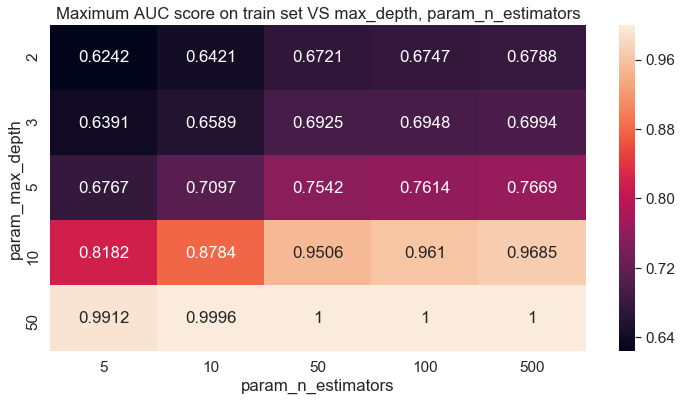

In [162]:
#https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
    
rf_gridsearch = pd.DataFrame(clf.cv_results_)

#Maximum AUC score on train set VS max_depth, min_samples_split
max_scores = rf_gridsearch.groupby(['param_max_depth',
                                    'param_n_estimators']).max().unstack()[['mean_test_score', 'mean_train_score']]
plt.rcParams["figure.figsize"] = (12, 6)

title = 'Maximum AUC score on train set VS max_depth, param_n_estimators'

sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');
plt.title(title);

rf_gridsearch.head(3)

### Hyper Prameters heatmap for test data

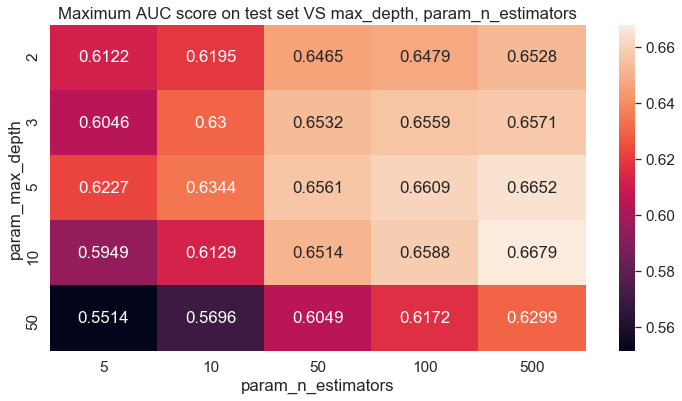

In [163]:
#Maximum AUC score on test set VS max_depth, min_samples_split

plt.rcParams["figure.figsize"] = (12, 6)

title = 'Maximum AUC score on test set VS max_depth, param_n_estimators'

sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');
plt.title(title);

### Train the model using the best hyperparameter

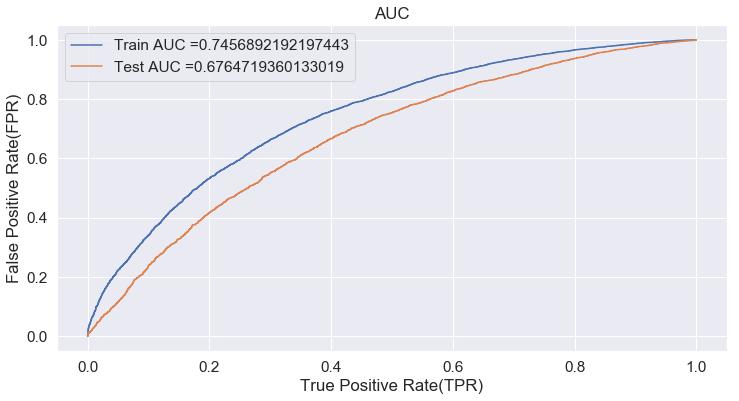

In [164]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

rf = RandomForestClassifier(max_depth = 5, n_estimators= 100,class_weight='balanced')

clf = rf.fit(X_train_merge, Y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = rf.predict_proba(X_train_merge)[:,1]    
y_test_pred = rf.predict_proba(X_test_merge)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(True)
plt.show()

### Confusion Matrix

In [165]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
print("="*100)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.48
[[ 2584  2584]
 [ 4940 23390]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.521
[[1782  764]
 [6266 7688]]


### Confusion Matrix - Heat map - Train

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.48


Text(80.5, 0.5, 'Actual Label')

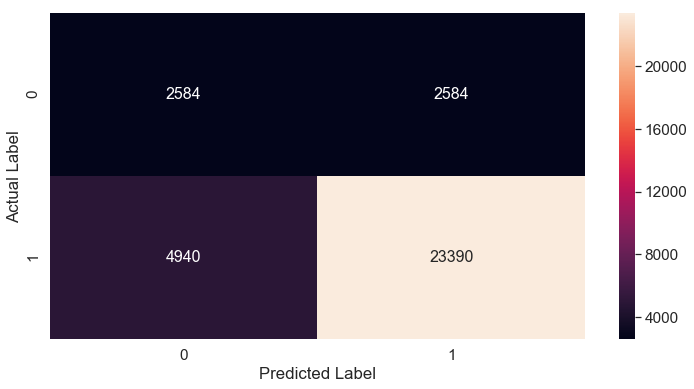

In [166]:
conf_matr_df_tfidf_train = pd.DataFrame(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

### Confusion Matrix - Heat Map -Test

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.521


Text(80.5, 0.5, 'Actual Label')

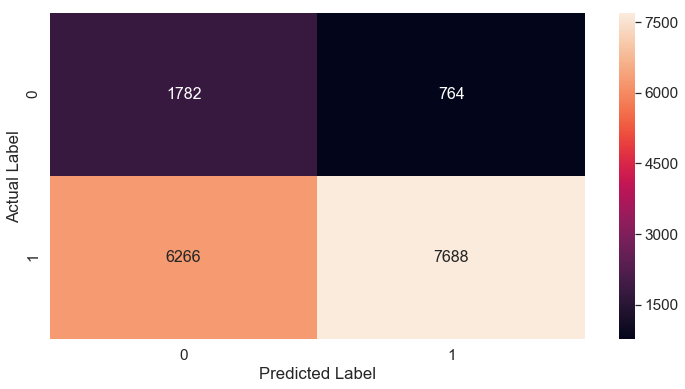

In [167]:
conf_matr_df_tfidf_test = pd.DataFrame(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

# 2.4.4 Applying Decision Tree on TFIDF W2V , SET 4

In [168]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merge = np.hstack((clean_cat_train_0,clean_cat_train_0, sub_cat_train_0,sub_cat_train_1,school_state_train_0,school_state_train_1,pg_cat_train_0,pg_cat_train_1,tp_cat_train_0,tp_cat_train_1, price_data_train, quant_train, prev_no_projects_train,np.array(title_tfidf_w2v_train), np.array(essay_tfidf_w2v_train)))
X_test_merge = np.hstack((clean_cat_test_0,clean_cat_test_0, sub_cat_test_0,sub_cat_test_1,school_state_test_0,school_state_test_1,pg_cat_test_0,pg_cat_test_1,tp_cat_test_0,tp_cat_test_1, price_data_test, quant_test, prev_no_projects_test,np.array(title_tfidf_w2v_test), np.array(essay_tfidf_w2v_test)))

print("Final Data matrix")
print("="*100)
print(X_train_merge.shape, Y_train.shape)
print(X_test_merge.shape, Y_test.shape)
print("="*100)

Final Data matrix
(33498, 613) (33498,)
(16500, 613) (16500,)


### Finding the best Hyper Parameter - Grid Search

In [169]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

parameters = {'n_estimators':[5, 10, 50, 100, 500], 'max_depth': [2,3,5,10,50]}


clf = GridSearchCV(rf, parameters, cv= 5 , scoring='roc_auc')

clf.fit(X_train_merge,Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

#Summary of the grid search
print('Best Score: ', clf.best_score_)
print('Best Params: ', clf.best_params_)

Best Score:  0.5757931919300264
Best Params:  {'max_depth': 5, 'n_estimators': 50}


### Hyper Prameters heatmap for train data 

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.241705      0.019011         0.015916        0.000579   
1       0.390228      0.040395         0.022758        0.007097   
2       1.390303      0.055859         0.046874        0.013970   

  param_max_depth param_n_estimators                                params  \
0               2                  5   {'max_depth': 2, 'n_estimators': 5}   
1               2                 10  {'max_depth': 2, 'n_estimators': 10}   
2               2                 50  {'max_depth': 2, 'n_estimators': 50}   

   split0_test_score  split1_test_score  split2_test_score  ...  \
0           0.549119           0.552802           0.549494  ...   
1           0.570828           0.550858           0.557963  ...   
2           0.574014           0.561154           0.561061  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.558071        0.009526               19            0.556367   
1         0.566875        0.013097               16            0.572833   
2         0.571544        0.011490                8            0.577256   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.574532            0.571901            0.562290   
1            0.570329            0.578792            0.575486   
2            0.580864            0.580989            0.571961   

   split4_train_score  mean_train_score  std_train_score  
0            0.572270          0.567472         0.006966  
1            0.573052          0.574099         0.002859  
2            0.575916          0.577397         0.003367  

[3 rows x 22 columns]

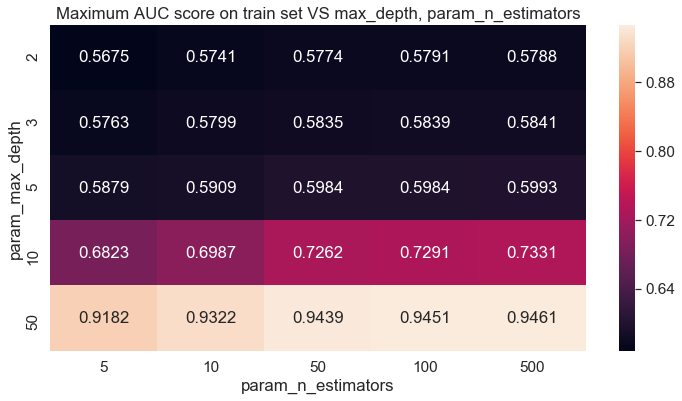

In [170]:
#https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
    
rf_gridsearch = pd.DataFrame(clf.cv_results_)

#Maximum AUC score on train set VS max_depth, min_samples_split
max_scores = rf_gridsearch.groupby(['param_max_depth',
                                    'param_n_estimators']).max().unstack()[['mean_test_score', 'mean_train_score']]
plt.rcParams["figure.figsize"] = (12, 6)

title = 'Maximum AUC score on train set VS max_depth, param_n_estimators'

sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');
plt.title(title);

rf_gridsearch.head(3)

### Hyper Prameters heatmap for test data

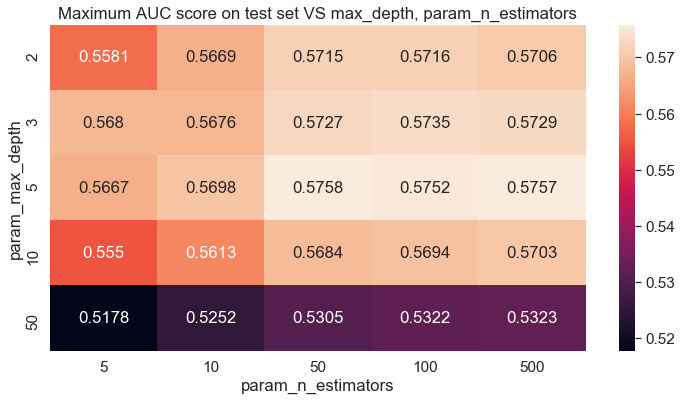

In [171]:
#Maximum AUC score on test set VS max_depth, min_samples_split

plt.rcParams["figure.figsize"] = (12, 6)

title = 'Maximum AUC score on test set VS max_depth, param_n_estimators'

sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');
plt.title(title);

### Train the model using the best Hyperparameter

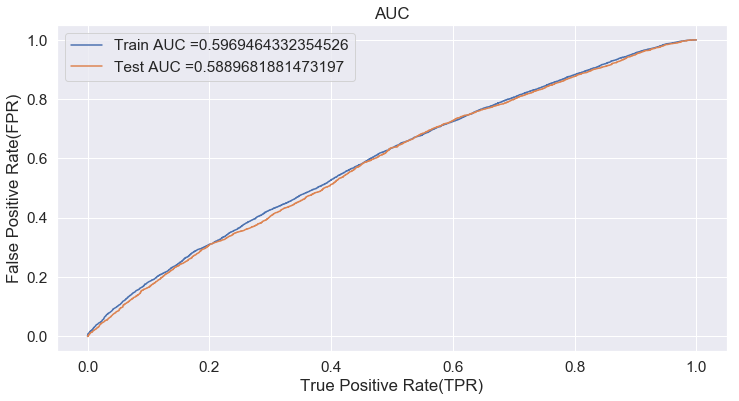

In [172]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

rf = RandomForestClassifier(max_depth = 5, n_estimators= 50,class_weight='balanced')

clf = rf.fit(X_train_merge, Y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = rf.predict_proba(X_train_merge)[:,1]    
y_test_pred = rf.predict_proba(X_test_merge)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(True)
plt.show()

### Confusion Matrix

In [173]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
print("="*100)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.486
[[ 2584  2584]
 [10329 18001]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.529
[[1991  555]
 [9464 4490]]


### Confusion Matrix - HeatMap - Train

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.486


Text(80.5, 0.5, 'Actual Label')

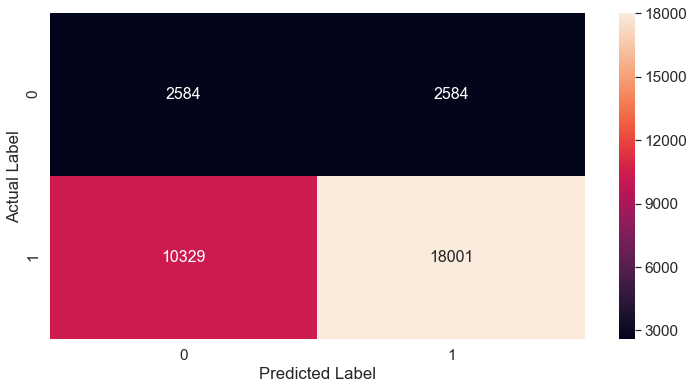

In [174]:
conf_matr_df_tfidf_train = pd.DataFrame(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

### Confusion Matrix - HeatMap - Test

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.529


Text(80.5, 0.5, 'Actual Label')

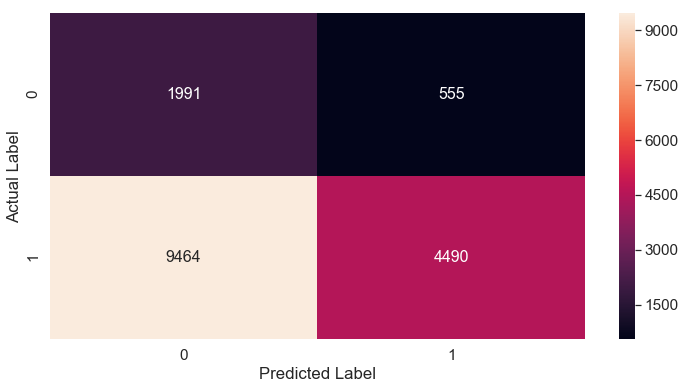

In [175]:
conf_matr_df_tfidf_test = pd.DataFrame(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

## Gradient Boosted Decision Trees - BOW

In [91]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merge = hstack((clean_cat_rc_train,sub_cat_rc_train,school_state_rc_train,project_grade_cat_rc_train,teacher_prefix_cat_rc_train,price_data_train,quant_train, prev_no_projects_train,title_bow_train, essay_bow_train)).tocsr()

X_test_merge = hstack((clean_cat_rc_test,sub_cat_rc_test,school_state_rc_test,project_grade_cat_rc_test,teacher_prefix_cat_rc_test, price_data_test, quant_test, prev_no_projects_test,title_bow_test, essay_bow_test)).tocsr()

print("Final Data matrix")
print("="*100)
print(X_train_merge.shape, Y_train.shape)
print(X_test_merge.shape, Y_test.shape)
print("="*100)

Final Data matrix
(33498, 11993) (33498,)
(16500, 11993) (16500,)


### Finding the best Hyper Parameter - Grid Search

In [92]:
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier()

param_distributions = {'n_estimators':[5, 10, 50, 100,500], 'max_depth': [2,5,10,20,50]}

clf = RandomizedSearchCV(gbdt, param_distributions, cv=3 , scoring='roc_auc' ,n_jobs=-1)

start_time = time.time()

clf.fit(X_train_merge,Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

#Summary of the Random search
print('Best Score: ', clf.best_score_)
print('Best Params: ', clf.best_params_)
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best Score:  0.686141668187491
Best Params:  {'n_estimators': 500, 'max_depth': 10}
Execution time: 6770.2401168346405 ms


### Hyper Prameters heatmap for train data 

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      56.985327      0.747590         0.124148        0.011611   
1    3429.043462     65.161828         1.100992        0.063364   
2      16.291989      0.847109         0.113113        0.009748   

  param_n_estimators param_max_depth                                  params  \
0                 10              10   {'n_estimators': 10, 'max_depth': 10}   
1                100              50  {'n_estimators': 100, 'max_depth': 50}   
2                 10               5    {'n_estimators': 10, 'max_depth': 5}   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.635263           0.626789           0.628727         0.630260   
1           0.593568           0.593741           0.611281         0.599530   
2           0.647897           0.635437           0.631769         0.638368   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.003625                6            0.843821            0.846951   
1        0.008309                9            1.000000            1.000000   
2        0.006903                5            0.699796            0.705658   

   split2_train_score  mean_train_score  std_train_score  
0            0.837789          0.842854     3.802252e-03  
1            1.000000          1.000000     3.621475e-09  
2            0.703050          0.702835     2.398013e-03

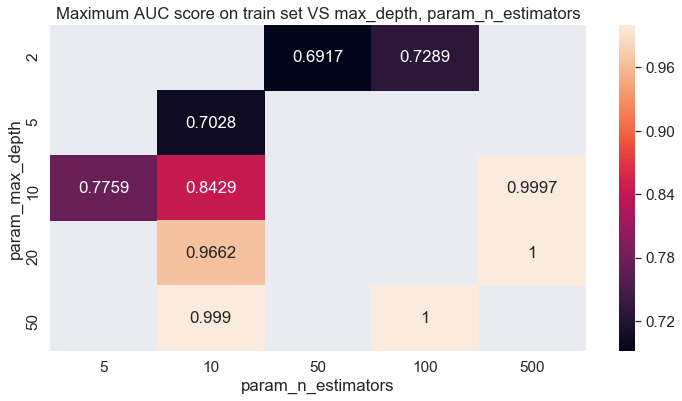

In [93]:
#https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
    
gbdt_randomsearch = pd.DataFrame(clf.cv_results_)

#Maximum AUC score on train set VS max_depth, param_n_estimators
max_scores = gbdt_randomsearch.groupby(['param_max_depth',
                                    'param_n_estimators']).max().unstack()[['mean_test_score', 'mean_train_score']]
plt.rcParams["figure.figsize"] = (12, 6)

title = 'Maximum AUC score on train set VS max_depth, param_n_estimators'

sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');
plt.title(title);

gbdt_randomsearch.head(3)

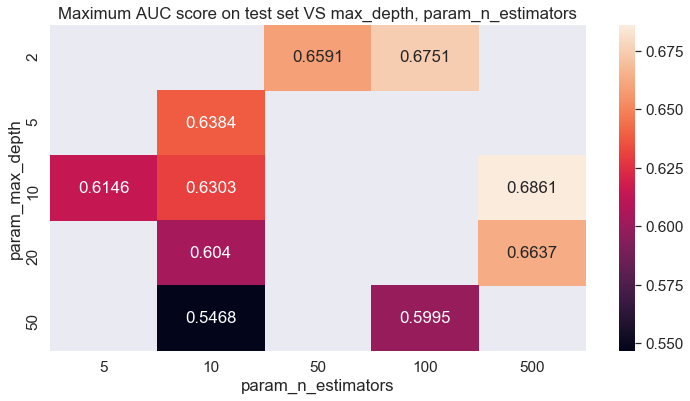

In [94]:
#Maximum AUC score on test set VS max_depth, min_samples_split

plt.rcParams["figure.figsize"] = (12, 6)

title = 'Maximum AUC score on test set VS max_depth, param_n_estimators'

sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');
plt.title(title);

### Train the model using the best Hyperparameter

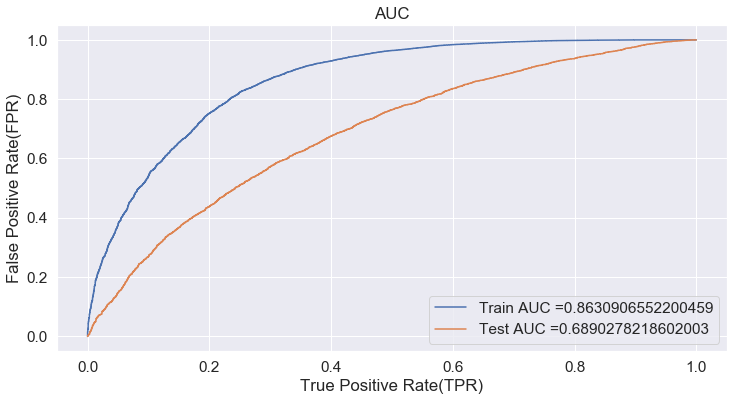

In [108]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

gbdt = GradientBoostingClassifier(max_depth = 5, n_estimators= 100)

clf = gbdt.fit(X_train_merge, Y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = gbdt.predict_proba(X_train_merge)[:,1]    
y_test_pred = gbdt.predict_proba(X_test_merge)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(True)
plt.show()

### Confusion Matrix

In [109]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
print("="*100)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.751
[[ 2584  2584]
 [ 1016 27314]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.836
[[1453 1093]
 [4191 9763]]


### Confusion Matrix - HeatMap - Train

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.751


Text(80.5, 0.5, 'Actual Label')

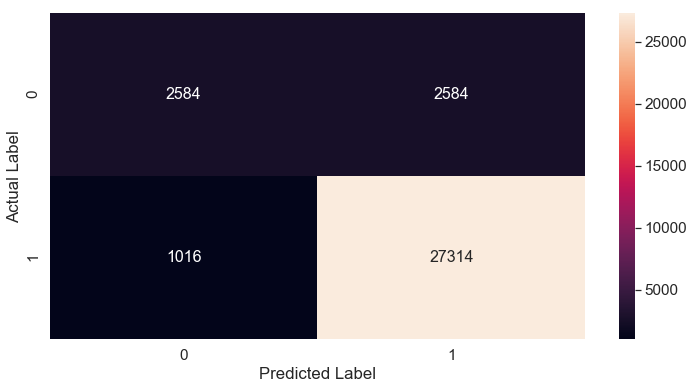

In [110]:
conf_matr_df_tfidf_train = pd.DataFrame(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

### Confusion Matrix - HeatMap - Test

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.836


Text(80.5, 0.5, 'Actual Label')

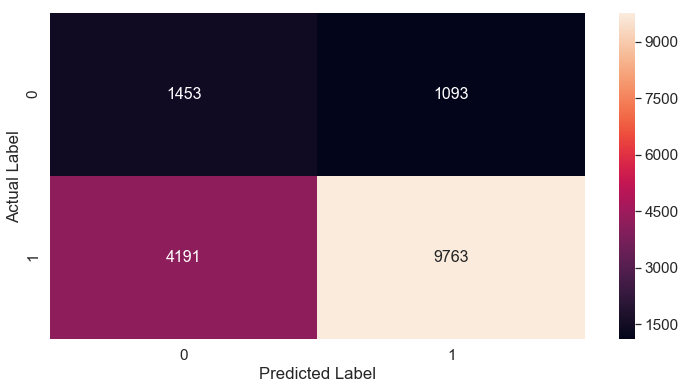

In [111]:
conf_matr_df_tfidf_test = pd.DataFrame(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

## Gradient Boosted Decision Trees - TFIDF

In [100]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merge = hstack((clean_cat_rc_train,sub_cat_rc_train,school_state_rc_train,project_grade_cat_rc_train,teacher_prefix_cat_rc_train,price_data_train, quant_train, prev_no_projects_train,title_tfidf_train, essay_tfidf_train)).tocsr()
X_test_merge = hstack((clean_cat_rc_test,sub_cat_rc_test,school_state_rc_test,project_grade_cat_rc_test,teacher_prefix_cat_rc_test, price_data_test, quant_test, prev_no_projects_test,title_tfidf_test, essay_tfidf_test)).tocsr()

print("Final Data matrix")
print("="*100)
print(X_train_merge.shape, Y_train.shape)
print(X_test_merge.shape, Y_test.shape)
print("="*100)

Final Data matrix
(33498, 11993) (33498,)
(16500, 11993) (16500,)


### Finding the best Hyper Parameter - Random Search

In [202]:
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier()

param_distributions = {'n_estimators':[5, 10, 50,100,500], 'max_depth': [2,5,10,20,50]}

clf = RandomizedSearchCV(gbdt, param_distributions, cv=3 , scoring='roc_auc' ,n_jobs=-1)

start_time = time.time()

clf.fit(X_train_merge,Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

#Summary of the Random search
print('Best Score: ', clf.best_score_)
print('Best Params: ', clf.best_params_)
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best Score:  0.6720097082683166
Best Params:  {'n_estimators': 100, 'max_depth': 5}
Execution time: 2827.016156435013 ms


### Hyper Prameters heatmap for train data 

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      21.165512      0.140202         0.108530        0.008094   
1      40.967837      0.196214         0.119965        0.007102   
2      78.813729      0.651812         0.137373        0.005526   

  param_n_estimators param_max_depth                                params  \
0                  5               5   {'n_estimators': 5, 'max_depth': 5}   
1                 10               5  {'n_estimators': 10, 'max_depth': 5}   
2                 50               2  {'n_estimators': 50, 'max_depth': 2}   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.622800           0.625813           0.624052         0.624222   
1           0.632899           0.636952           0.639668         0.636506   
2           0.658539           0.653648           0.663577         0.658588   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.001236                7            0.672454            0.670461   
1        0.002781                6            0.711610            0.709311   
2        0.004054                4            0.704819            0.699687   

   split2_train_score  mean_train_score  std_train_score  
0            0.667608          0.670174         0.001989  
1            0.708611          0.709844         0.001281  
2            0.702827          0.702444         0.002113

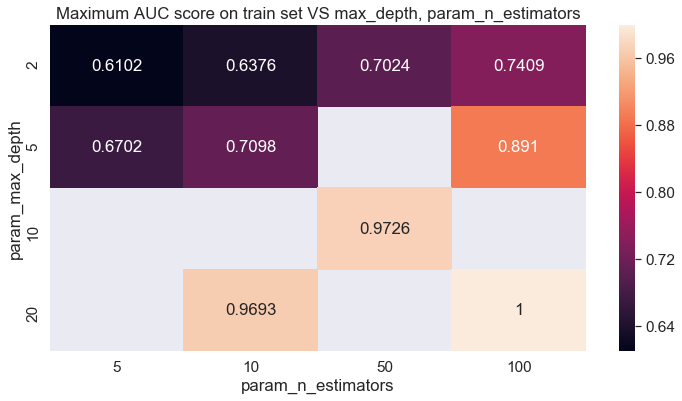

In [204]:
#https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
    
gbdt_randomsearch = pd.DataFrame(clf.cv_results_)

#Maximum AUC score on train set VS max_depth, min_samples_split
max_scores = gbdt_randomsearch.groupby(['param_max_depth',
                                    'param_n_estimators']).max().unstack()[['mean_test_score', 'mean_train_score']]
plt.rcParams["figure.figsize"] = (12, 6)

title = 'Maximum AUC score on train set VS max_depth, param_n_estimators'

sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');
plt.title(title);

gbdt_randomsearch.head(3)

### Hyper Prameters heatmap for test data

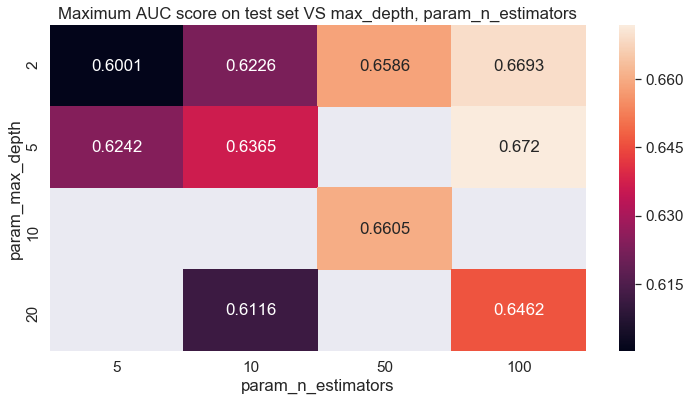

In [205]:
#Maximum AUC score on test set VS max_depth, min_samples_split

plt.rcParams["figure.figsize"] = (12, 6)

title = 'Maximum AUC score on test set VS max_depth, param_n_estimators'

sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');
plt.title(title);

### Train the model using the best Hyperparameter

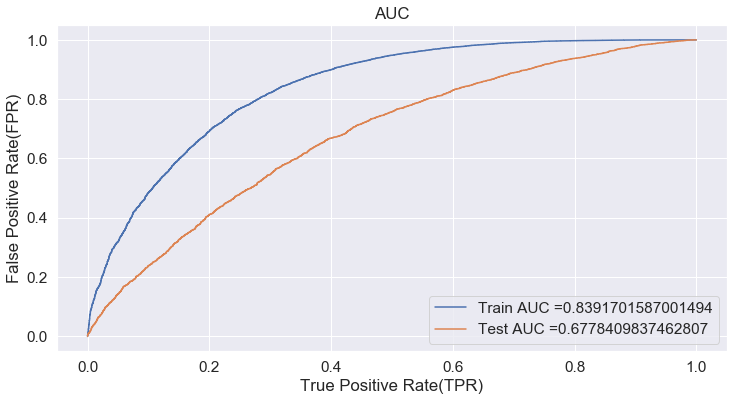

In [164]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

gbdt = GradientBoostingClassifier(max_depth = 5, n_estimators= 50)

clf = gbdt.fit(X_train_merge, Y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = gbdt.predict_proba(X_train_merge)[:,1]    
y_test_pred = gbdt.predict_proba(X_test_merge)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(True)
plt.show()

### Confusion Matrix

In [165]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
print("="*100)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999985023339627 for threshold 0.753
[[ 2582  2586]
 [ 1469 26861]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.844
[[1484 1062]
 [4490 9464]]


### Confusion Matrix - HeatMap - Train

the maximum value of tpr*(1-fpr) 0.24999985023339627 for threshold 0.753


Text(80.5, 0.5, 'Actual Label')

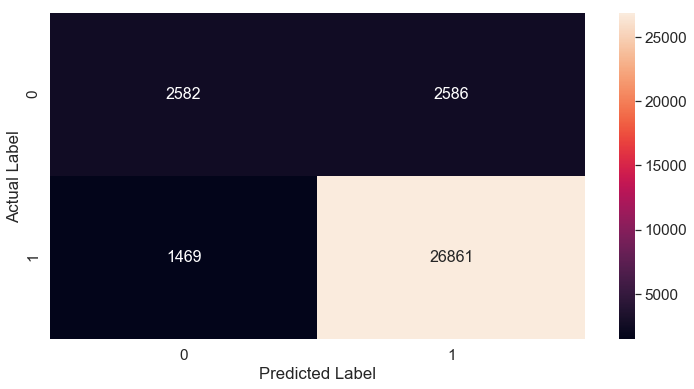

In [166]:
conf_matr_df_tfidf_train = pd.DataFrame(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

### Confusion Matrix - HeatMap - Test

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.844


Text(80.5, 0.5, 'Actual Label')

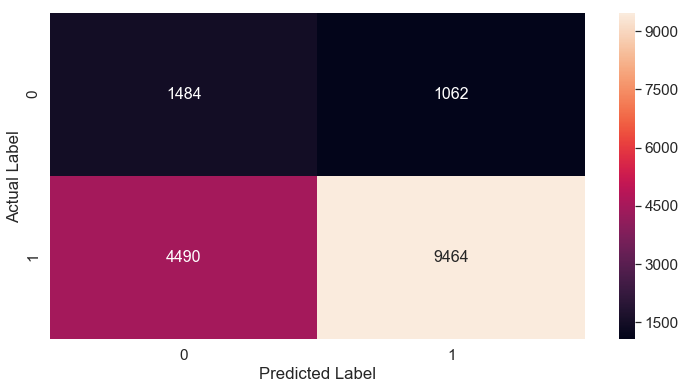

In [167]:
conf_matr_df_tfidf_test = pd.DataFrame(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

## Gradient Boosted Decision Trees - AVG-W2V

In [140]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merge = np.hstack((clean_cat_train_0,clean_cat_train_0, sub_cat_train_0,sub_cat_train_1,school_state_train_0,school_state_train_1,pg_cat_train_0,pg_cat_train_1,tp_cat_train_0,tp_cat_train_1, price_data_train, quant_train, prev_no_projects_train,title_avg_w2v_train_array,essay_avg_w2v_train_array))
X_test_merge = np.hstack((clean_cat_test_0,clean_cat_test_0, sub_cat_test_0,sub_cat_test_1,school_state_test_0,school_state_test_1,pg_cat_test_0,pg_cat_test_1,tp_cat_test_0,tp_cat_test_1, price_data_test, quant_test, prev_no_projects_test,title_avg_w2v_test_array,essay_avg_w2v_test_array))

print("Final Data matrix")
print("="*100)
print(X_train_merge.shape, Y_train.shape)
print(X_test_merge.shape, Y_test.shape)
print("="*100)

Final Data matrix
(33498, 613) (33498,)
(16500, 613) (16500,)


### Finding the best Hyper Parameter - Random Search

In [69]:
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier()

param_distributions = {'n_estimators':[5, 10, 50, 100],'max_depth': [2,5,10,20]}

clf = RandomizedSearchCV(gbdt, param_distributions, cv=3 , scoring='roc_auc' ,n_jobs=-1)

start_time = time.time()

clf.fit(X_train_merge,Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

#Summary of the Random search
print('Best Score: ', clf.best_score_)
print('Best Params: ', clf.best_params_)
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best Score:  0.6802062245626891
Best Params:  {'n_estimators': 100, 'max_depth': 5}
Execution time: 22668.860751628876 ms


### Hyper Prameters heatmap for train data 

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0    1012.003901      5.719021         0.330790        0.071700   
1    1827.965115     18.651939         0.248524        0.014254   
2    1795.457144     89.742268         0.189147        0.045859   

  param_n_estimators param_max_depth                                 params  \
0                100               5  {'n_estimators': 100, 'max_depth': 5}   
1                 50              10  {'n_estimators': 50, 'max_depth': 10}   
2                 10              20  {'n_estimators': 10, 'max_depth': 20}   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.681645           0.680677           0.678297         0.680206   
1           0.661200           0.653367           0.659153         0.657907   
2           0.580604           0.580694           0.585334         0.582210   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.001407                1            0.932882            0.930800   
1        0.003317                4            0.999993            0.999901   
2        0.002209                9            0.999741            0.999867   

   split2_train_score  mean_train_score  std_train_score  
0            0.930986          0.931556         0.000941  
1            0.999999          0.999964         0.000045  
2            0.999912          0.999840         0.000072

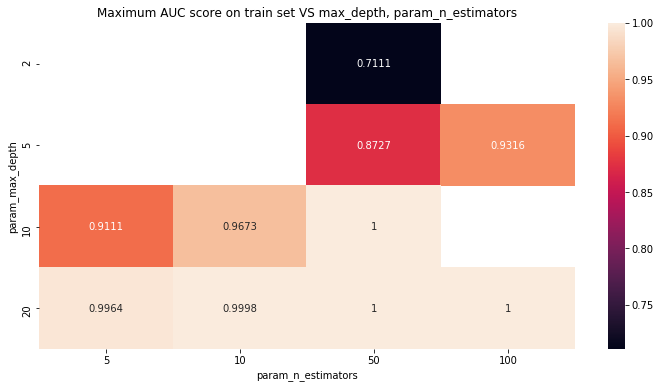

In [70]:
#https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
    
gbdt_randomsearch = pd.DataFrame(clf.cv_results_)

#Maximum AUC score on train set VS max_depth, min_samples_split
max_scores = gbdt_randomsearch.groupby(['param_max_depth',
                                    'param_n_estimators']).max().unstack()[['mean_test_score', 'mean_train_score']]
plt.rcParams["figure.figsize"] = (12, 6)

title = 'Maximum AUC score on train set VS max_depth, param_n_estimators'

sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');
plt.title(title);

gbdt_randomsearch.head(3)

### Hyper Prameters heatmap for test data

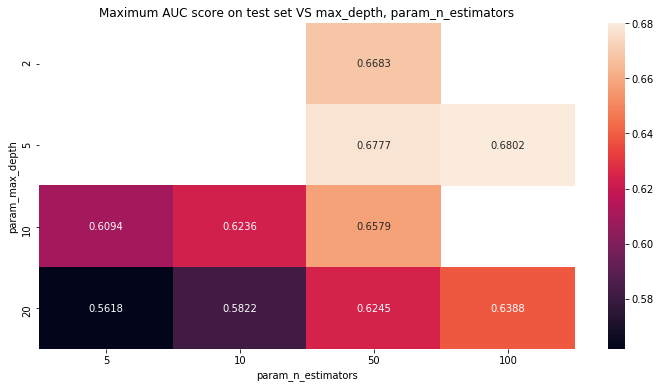

In [71]:
#Maximum AUC score on test set VS max_depth, min_samples_split

plt.rcParams["figure.figsize"] = (12, 6)

title = 'Maximum AUC score on test set VS max_depth, param_n_estimators'

sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');
plt.title(title);

### Train the model using the best Hyperparameter

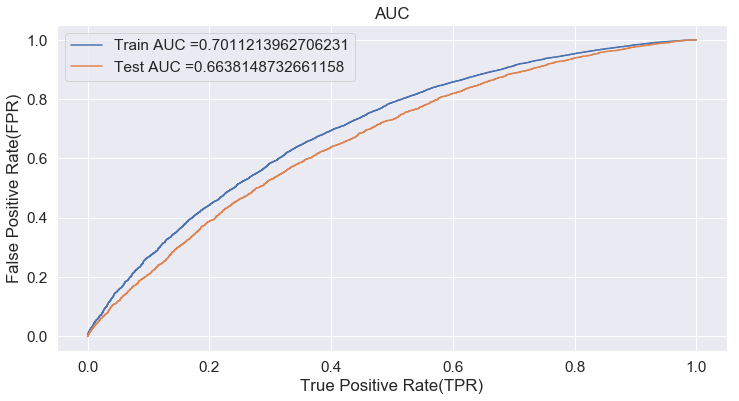

In [154]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

gbdt = GradientBoostingClassifier(max_depth = 2, n_estimators=50 )

clf = gbdt.fit(X_train_merge, Y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = gbdt.predict_proba(X_train_merge)[:,1]    
y_test_pred = gbdt.predict_proba(X_test_merge)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(True)
plt.show()

### Confusion Matrix

In [150]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
print("="*100)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999996255834908 for threshold 0.646
[[ 2583  2585]
 [  216 28114]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999984572938835 for threshold 0.778
[[  942  1604]
 [ 1973 11981]]


### Confusion Matrix - HeatMap - Train

the maximum value of tpr*(1-fpr) 0.24999996255834908 for threshold 0.646


Text(80.5, 0.5, 'Actual Label')

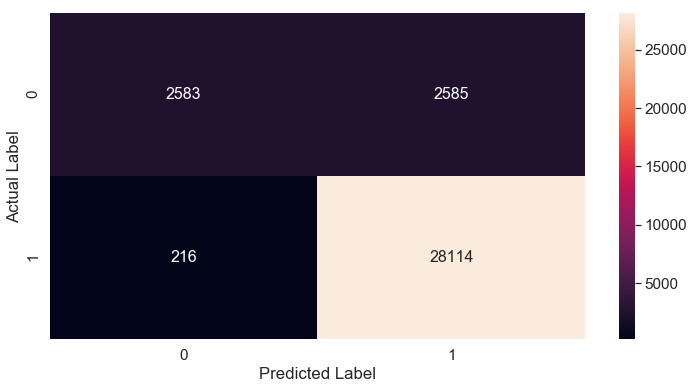

In [151]:
conf_matr_df_tfidf_train = pd.DataFrame(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

### Confusion Matrix - HeatMap - Test

the maximum value of tpr*(1-fpr) 0.24999984572938835 for threshold 0.778


Text(80.5, 0.5, 'Actual Label')

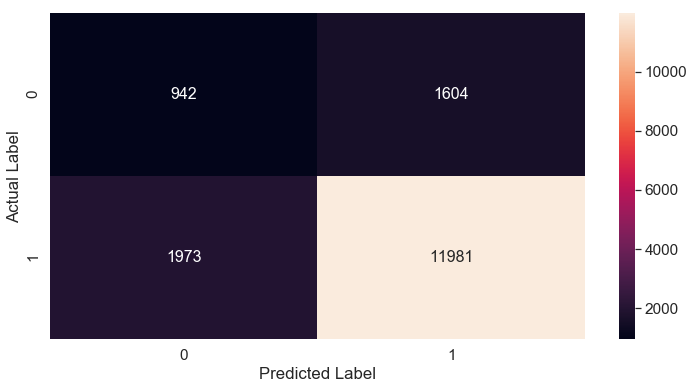

In [152]:
conf_matr_df_tfidf_test = pd.DataFrame(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

## Gradient Boosted Decision Trees - TFIDF-W2V

In [78]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merge = np.hstack((clean_cat_train_0,clean_cat_train_0, sub_cat_train_0,sub_cat_train_1,school_state_train_0,school_state_train_1,pg_cat_train_0,pg_cat_train_1,tp_cat_train_0,tp_cat_train_1, price_data_train, quant_train, prev_no_projects_train,np.array(title_tfidf_w2v_train), np.array(essay_tfidf_w2v_train)))
X_test_merge = np.hstack((clean_cat_test_0,clean_cat_test_0, sub_cat_test_0,sub_cat_test_1,school_state_test_0,school_state_test_1,pg_cat_test_0,pg_cat_test_1,tp_cat_test_0,tp_cat_test_1, price_data_test, quant_test, prev_no_projects_test,np.array(title_tfidf_w2v_test), np.array(essay_tfidf_w2v_test)))

print("Final Data matrix")
print("="*100)
print(X_train_merge.shape, Y_train.shape)
print(X_test_merge.shape, Y_test.shape)
print("="*100)

Final Data matrix
(33498, 613) (33498,)
(16500, 613) (16500,)


### Finding the best Hyper Parameter - Random Search

In [79]:
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier()

param_distributions = {'n_estimators':[5, 10, 50, 100 ,200],'max_depth': [2,5,10,20,50]}

clf = RandomizedSearchCV(gbdt, param_distributions, cv=3 , scoring='roc_auc' ,n_jobs=-1)

start_time = time.time()

clf.fit(X_train_merge,Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

#Summary of the Random search
print('Best Score: ', clf.best_score_)
print('Best Params: ', clf.best_params_)
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best Score:  0.5839595078337603
Best Params:  {'n_estimators': 50, 'max_depth': 2}
Execution time: 543.201512336731 ms


### Hyper Prameters heatmap for train data 

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      12.372622      0.121704         0.104281        0.013678   
1     111.718457      1.120844         0.362554        0.003740   
2      27.159685      0.608677         0.128643        0.011448   

  param_n_estimators param_max_depth                                 params  \
0                 10              10  {'n_estimators': 10, 'max_depth': 10}   
1                200               5  {'n_estimators': 200, 'max_depth': 5}   
2                 50               2   {'n_estimators': 50, 'max_depth': 2}   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.558850           0.548689           0.550175         0.552572   
1           0.558433           0.556129           0.556145         0.556902   
2           0.589897           0.576233           0.585748         0.583960   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.004481                4            0.779149            0.759900   
1        0.001083                3            0.726011            0.720689   
2        0.005720                1            0.596292            0.598821   

   split2_train_score  mean_train_score  std_train_score  
0            0.774626          0.771225         0.008218  
1            0.723863          0.723521         0.002186  
2            0.595146          0.596753         0.001535

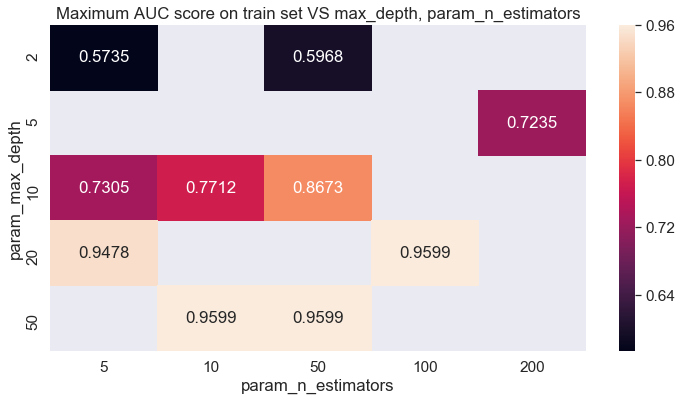

In [81]:
#https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
    
gbdt_randomsearch = pd.DataFrame(clf.cv_results_)

#Maximum AUC score on train set VS max_depth, min_samples_split
max_scores = gbdt_randomsearch.groupby(['param_max_depth',
                                    'param_n_estimators']).max().unstack()[['mean_test_score', 'mean_train_score']]
plt.rcParams["figure.figsize"] = (12, 6)

title = 'Maximum AUC score on train set VS max_depth, param_n_estimators'

sns.heatmap(max_scores.mean_train_score, annot=True, fmt='.4g');
plt.title(title);

gbdt_randomsearch.head(3)

### Hyper Prameters heatmap for test data

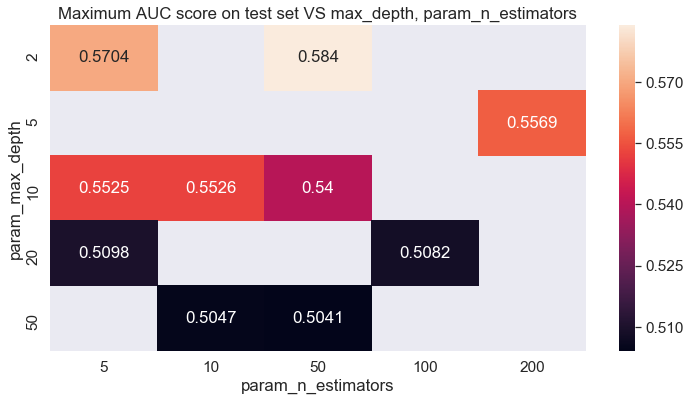

In [82]:
#Maximum AUC score on test set VS max_depth, min_samples_split

plt.rcParams["figure.figsize"] = (12, 6)

title = 'Maximum AUC score on test set VS max_depth, param_n_estimators'

sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');
plt.title(title);

### Train the model using the best Hyperparameter

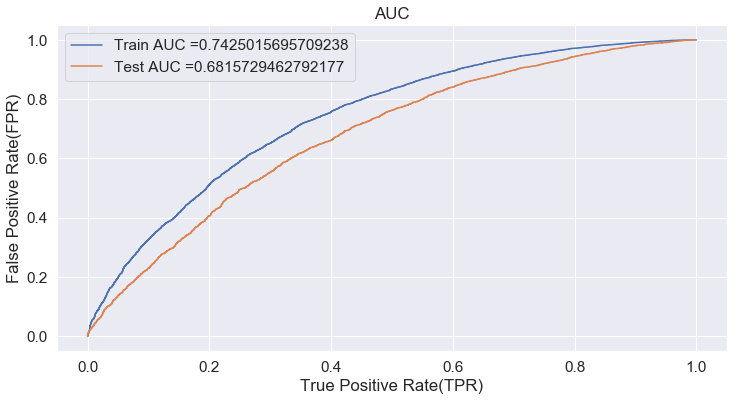

In [157]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

gbdt = GradientBoostingClassifier(max_depth = 2, n_estimators= 150)

clf = gbdt.fit(X_train_merge, Y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = gbdt.predict_proba(X_train_merge)[:,1]    
y_test_pred = gbdt.predict_proba(X_test_merge)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(True)
plt.show()

### Confusion Matrix

In [160]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
print("="*100)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.8
[[ 2584  2584]
 [ 4695 23635]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.864
[[1814  732]
 [6468 7486]]


### Confusion Matrix - HeatMap - Train

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.8


Text(80.5, 0.5, 'Actual Label')

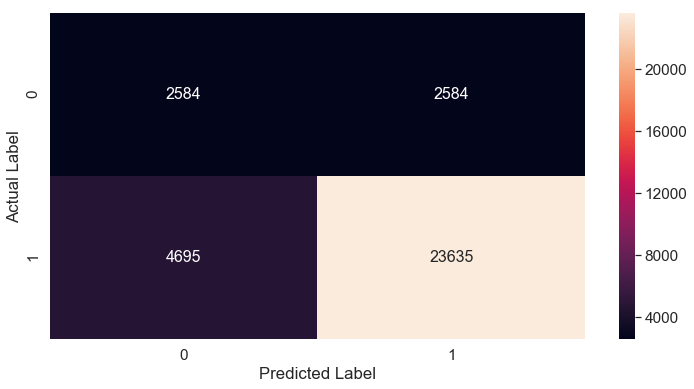

In [161]:
conf_matr_df_tfidf_train = pd.DataFrame(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_train, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

### Confusion Matrix - HeatMap - Test

the maximum value of tpr*(1-fpr) 0.25 for threshold 0.864


Text(80.5, 0.5, 'Actual Label')

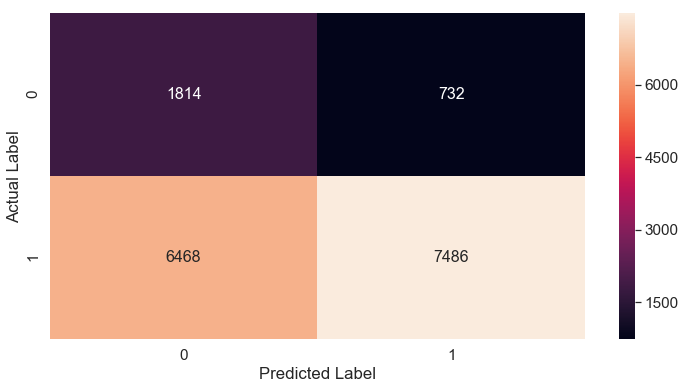

In [162]:
conf_matr_df_tfidf_test = pd.DataFrame(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_tfidf_test, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

## Conclusion

In [163]:
# Compare all your models using Prettytable library
#http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

x_pretty_table = PrettyTable()
x_pretty_table.field_names = ["Model Type","Vectorizer","max_depth","n_estimators","Train-AUC","Test-AUC"]

x_pretty_table.add_row(["Random Forest","BOW",10,500,0.89,0.69])
x_pretty_table.add_row([ "Random Forest","TFIDF",5,100,0.75,0.68])
x_pretty_table.add_row([ "Random Forest","AVG W2V",5,100,0.75,0.68])
x_pretty_table.add_row([ "Random Forest","TFIDF W2V",5,50,0.60,0.59])
x_pretty_table.add_row(["GBDT","BOW",5,100,0.85,0.69])
x_pretty_table.add_row([ "GBDT","TFIDF",5,50,0.84,0.68])
x_pretty_table.add_row([ "GBDT","AVG W2V",2,50,0.70,0.66])
x_pretty_table.add_row([ "GBDT","TFIDF W2V",2,100,0.74,0.68])

print(x_pretty_table)

+---------------+------------+-----------+--------------+-----------+----------+
|   Model Type  | Vectorizer | max_depth | n_estimators | Train-AUC | Test-AUC |
+---------------+------------+-----------+--------------+-----------+----------+
| Random Forest |    BOW     |     10    |     500      |    0.89   |   0.69   |
| Random Forest |   TFIDF    |     5     |     100      |    0.75   |   0.68   |
| Random Forest |  AVG W2V   |     5     |     100      |    0.75   |   0.68   |
| Random Forest | TFIDF W2V  |     5     |      50      |    0.6    |   0.59   |
|      GBDT     |    BOW     |     5     |     100      |    0.85   |   0.69   |
|      GBDT     |   TFIDF    |     5     |      50      |    0.84   |   0.68   |
|      GBDT     |  AVG W2V   |     2     |      50      |    0.7    |   0.66   |
|      GBDT     | TFIDF W2V  |     2     |     100      |    0.74   |   0.68   |
+---------------+------------+-----------+--------------+-----------+----------+
